# Transformações de imagens: operações básicas

In [80]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [81]:
# Função para exibir imagem dentro do notebook.
def exibir_imagem_plt(img):
	img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
	plt.imshow(img)
	print(f"Dimensões da imagem: {img.shape[:2]}")

In [82]:
# Exibindo a imagem externamente usando o OpenCv
def exibir_imagem_cv(img):
	cv.imshow("IMAGE", img)
	cv.waitKey(0)
	cv.destroyAllWindows()

Lendo nossa imagem

In [83]:
img = cv.imread('earth.jpg')
assert img is not None, 'arquivo não pode ser lido'

In [84]:
# Exibir a imagem usando o OpenCv
exibir_imagem_cv(img)

Dimensões da imagem: (532, 800)
Imagem Original


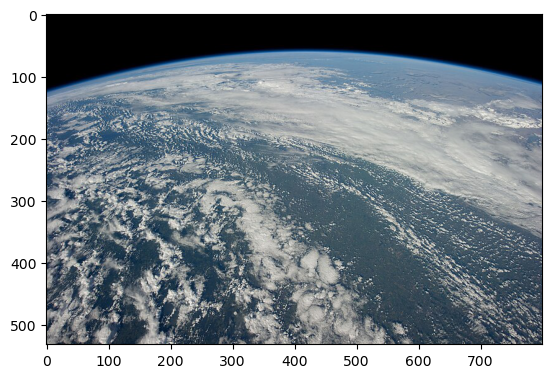

In [85]:
# Exibir a imagem usando o Matplotlib
exibir_imagem_plt(img)
print("Imagem Original")

## Redimensionamento 

`cv.resize()` é uma função do OpenCv para realizar mudança de escala.
Ela recebe os argumentos:
- src: imagem de entrada
- dsize: tamanho da imagem de saída
- fx: fator de escala do eixo X
- fy: fator de escala do eixo Y
- interpolation: tipo de interpolação utilizada

Valores possíveis para o argumento de `interpolation`:
- `cv.INTER_LINEAR`
- `cv.INTER_CUBIC`
- `cv.INTER_AREA`

In [86]:
scale_percentage = 80
o_heigth, o_width = img.shape[:2]
mod_width = int(o_width * scale_percentage / 100)
mod_heigth = int(o_heigth * scale_percentage / 100)
mod_dim = (mod_width, mod_heigth)
o_dim = (o_width, o_heigth)

### Ampliação

In [87]:
upsized_img = cv.resize(img, mod_dim, interpolation=cv.INTER_AREA)

In [88]:
upsized_img = cv.resize(src=img, dsize=None, fx=2, fy=2, interpolation=cv.INTER_LINEAR)

Dimensões da imagem: (1064, 1600)


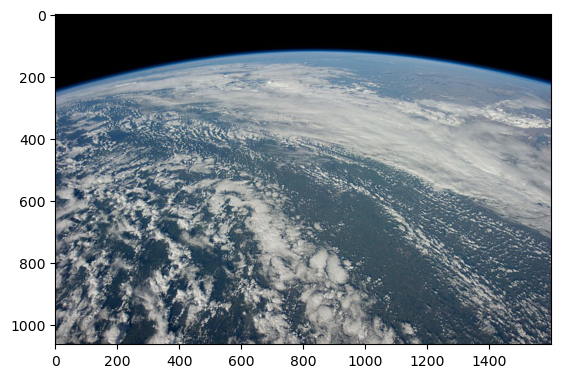

In [89]:
exibir_imagem_plt(upsized_img)

### Redução

In [90]:
downsized_img = cv.resize(img, mod_dim,interpolation=cv.INTER_AREA)

Dimensões da imagem: (425, 640)


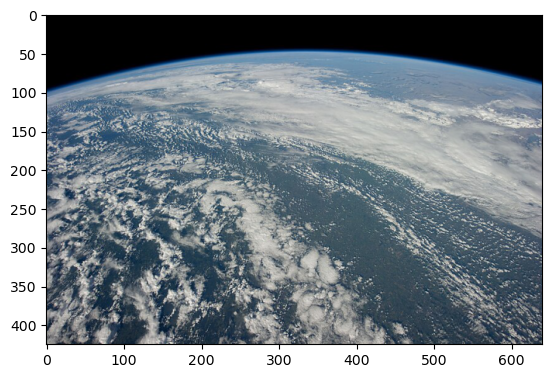

In [91]:
exibir_imagem_plt(downsized_img)

## Translação

In [119]:
dog = cv.imread('./dog.jpg')
assert dog is not None, 'arquivo não pode ser lido'

In [166]:
matriz_translacao = np.float64([[1,0,100], [0,1,50]])

In [162]:
translated_img = cv.warpAffine(dog, matriz_translacao, o_dim)

Dimensões da imagem: (532, 800)


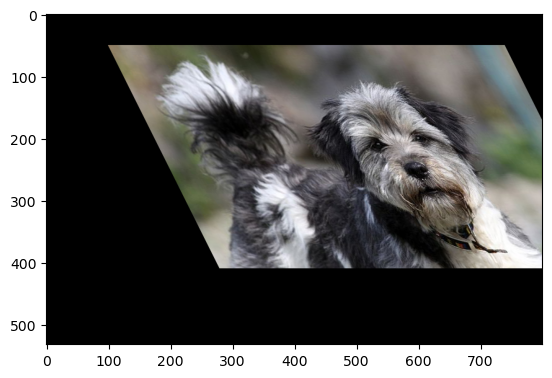

In [163]:
exibir_imagem_plt(translated_img)

## Rotação


In [95]:
# Definindo parâmetros da matriz de rotação
escala = 1
centro = (o_width / 2, o_heigth / 2)

In [96]:
matriz_rotacao = cv.getRotationMatrix2D(centro, 180, escala)
rotated_img = cv.warpAffine(img, matriz_rotacao, o_dim)

O último argumento da função `cv.warpAffine()` está relacionado com as dimensões da imagem de saída.

Dimensões da imagem: (532, 800)


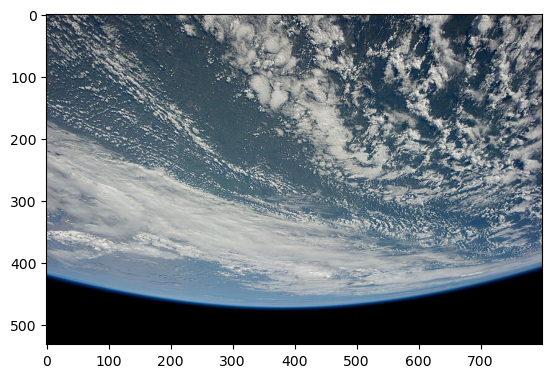

In [97]:
exibir_imagem_plt(rotated_img)

## Espelhamento

A função `cv.flip()` recebe dois argumentos:

- a imagem
- número inteiro representando a partir de qual eixo a imagem será espelhada:
	- 1 para espelhar horizontalmente
	- 0 para espelhar verticalmente

Dimensões da imagem: (532, 800)


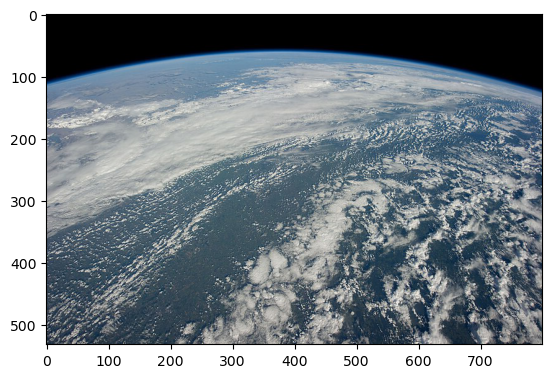

In [98]:
flipped_img = cv.flip(img, 1)
exibir_imagem_plt(flipped_img)

## Salvando uma imagem

In [167]:
new_dog = cv.imwrite('./new_dog.jpg', translated_img)
new_earth = cv.imwrite('./new_earth.jpg', flipped_img)

